# Introduction to the likelihood

When we are fitting the parameters $\alpha$ in some model $\mathcal{M}(x;\alpha)$ to some data $\mathcal{D} = \{x_i , y_i\}$, how do we judge how well a given model prediction $\{ x_i , y_m(x_i;\alpha) \equiv \mathcal{M}(x_i;\alpha) \} $ describes our data $\mathcal{D}$?

We have to come up with a model for the *likelihood*. This is the conditional probability that our data $\mathcal{D}$ (also called evidence) is described by a given model prediction $y_m(x_i;\alpha)$. We can write it as $p(\mathcal{D} | y_m(x_i;\alpha))$ or $p(\mathcal{D} | \mathcal{M}, \alpha)$. Sometimes we use $\mathcal{L}$ instead of $p$ to write the likelihood, but it is just a conditional probability. 

Every method for fitting or calibrating a model (whether it is explicitly stated or not) makes some assumption about the likelihood.

How do we come up with a *defensible* form for the likelihood for a given set of evidence and a given model? 

## A very simple likelihood model 

What if there are no errors in our model or in $\{ x_i, y_i\}$ at all? Then our model must exactly reproduce $y_i$, and our lileihood is:

\begin{equation}
p(\{ x_i,y_i \} | y_m(x_i;\alpha) ) = \begin{cases} 1 & y_m(x_i;\alpha) = y_i \\ 0 & \rm{otherwise} \end{cases}
\end{equation}

Can you guess what issues this might have?

## The general case

In real cases, our evidence $\mathcal{D}$ is more than just a set of numbers $\{x_i , y_i\}$. It is, in fact, a probability distribution itself: $\mathcal{D} \equiv p( \vec{x}, \vec{y} )$; a given $\{x,y\}$ pair is a measurement of a random variable. Based on the uncertainty information provided by the experimentalists, we must come up with a reasonable model for what $p( \vec{x}, \vec{y} )$ is, and use it to construct a likelihood. 

Then, when we do a frequentist model fit, we are searching through $\alpha$-space trying to find $\text{arg max} \left[ p(\mathcal{D}| \mathcal{M},\alpha) \right]$. This is called Maximum Likelihood Estimation (MLE). 

As we shall see, minimizing the $\chi^2$ is just a special case of MLE, subject to certain assumptions (which may not always be appropriate!).

When we do a Bayesian calibration, we sample $\alpha$-space in such a way that the samples converge on a distribution that is related to the likelihood, called the posterior $p(\alpha | \mathcal{D}, \mathcal{M}) $, which just modifies the likelihood to include prior belief about $\alpha$: 

\begin{equation}
p(\alpha | \mathcal{D}, \mathcal{M}) = p(\mathcal{D}| \mathcal{M},\alpha) p(\alpha).
\end{equation}

In Bayesian calibration as well, one often sees the likelihood $p(\mathcal{D}| \mathcal{M},\alpha)$ modeled as $\exp(-\chi^2)$. Again, this may not always be appropriate! 

## Under what assumptions is a $\chi^2$-distribution appropriate for the likelihood?

let us *assume* there is some ground truth $\{x_i, y_i^\rm{true}\}$, and futhermore assume that our model, for some unknown true parameters, is able to exactly replicate the truth:

\begin{equation}
M(x_i;\alpha^\rm{true}) =  y_i^\rm{true}
\end{equation}

This may be a big assumption, and, in realistic scenarios, one may want to to instead use 

\begin{equation}
M(x_i;\alpha^\rm{true}) =  y_i^\rm{true} + \epsilon_i
\end{equation}

Where $\epsilon_i$ is another random variable describing the model error. We will ignore this for now.

Now we need more assumptions: the measured values $\vec{x}, \vec{y}$ are random vectors from some multivariate probability distribution $p(\vec{x},\vec{y})$.

Let's assume:
- there is no error in $x$; $x_i = x_i^\rm{true}$
- each $y_i$ is really a number of counts in the bin $x_i = \left[ x_i , x_{i+1} \right]$
- each count is independent of all the others


If there are $N$ total counts, then $p_i = y_i^\rm{true}/N$ is the probability of a count being in bin $i$, and $ 1 - p_i$ is the probability of not being in bin $i$. 

Our model prediction is for the probability of a single count being in bin $i$ is just $y_m(x_i;\alpha) / N$. 

The probability of getting exactly $y$ counts in bin $i$ in $N$ trials is a binomial distribution:

\begin{equation}
p(y_i | N, p_i ) = B(N,p_i) \equiv  \binom{N}{y_i} p_i^{y_i} (1-p_i)^{N-y_i} 
\end{equation}

Plugging in our model prediction for $p_i$, we have the likelihood 

\begin{equation}
p(y_i | N, p_i = \mathcal{M}(x_i;\alpha)/N ) = B(N,\mathcal{M}(x_i;\alpha)/N) \equiv  \binom{N}{y_i} \left( \frac{y_m(x_i;\alpha)}{N} \right)^{y_i} \left( 1- \frac{y_m(x_i;\alpha)}{ N} \right)^{N-y_i} 
\end{equation}

The total liklelihood is the product of this probability for every bin:

\begin{equation}
p( \mathcal{D} | N, \mathcal{M} , \alpha)) =  \prod_i B(N,\mathcal{M}(x_i;\alpha)/N) \equiv \prod_i \binom{N}{y_i} \left( \frac{y_m(x_i;\alpha)}{N} \right)^{y_i} \left( 1- \frac{y_m(x_i;\alpha)}{ N} \right)^{N-y_i} 
\end{equation}

As long as $N$ is known exactly (it's own can of worms), then this is exactly what we are looking for! In principle, one could exactly use this formula in this situation.


How do we get the $\chi^2$ form? Well, when $N \rightarrow \infty$ and $p_i^\rm{true} \rightarrow 0$ such that $N p_i^\rm{true} = y_i^\rm{true}$ stays constant, the binomial distribution limits to a Poission distribution, with mean $y_i^{\rm{true}}$ and standard deviation $\sigma_i = \sqrt{y_i^{\rm{true}}}$:

\begin{equation}
p( \mathcal{D} | N, \mathcal{M} , \alpha) \rightarrow \prod_i \frac{ (y_i^{\rm{true}})^y }{ y\! } e^{-y_i^{\rm{true}}}
\end{equation}

Then using the Central Limit Theorem, we find in the limit as $N \rightarrow \infty$ and $0 < p_i < 1$ fixed:

\begin{align}
p( \mathcal{D} | N, \mathcal{M} , \alpha) &\rightarrow \prod_i \frac{1}{\sqrt{2 \pi y_i^{\rm{true}}}} \exp{ - \frac{\left( y_i - y_i^{\rm{true}}\right)^2}{ 2 y_i^{\rm{true}}} }
\end{align}

Plugging in $y_m(x_i;\alpha)$ for $y_i^\rm{true}$ and $\sigma_i$ for the standard deviation, we have:

\begin{equation}
p( \mathcal{D} | N, \mathcal{M} , \alpha) = \prod_i \frac{1}{\sqrt{2 \pi \sigma_i^2}} \exp{ \left( \frac{(y_i - y_m(x_i;\alpha))^2}{2 \sigma_i^2} \right)}
\end{equation}

Take the log of this function and you have the $\chi^2$ form:


\begin{equation}
- \log p( \mathcal{D} | N, \mathcal{M} , \alpha) \propto \sum_i \frac{(y_i - y_m(x_i;\alpha))^2}{2 \sigma_i^2} \equiv \chi^2
\end{equation}


If you've taken a stats course, you've probably done these two limits at some point or another. A nice pedagogical source for derivations of Poisson and Normal distributions limiting from binomial is [The Knolly Bible, Ch. 3](https://indico-tdli.sjtu.edu.cn/event/171/contributions/2123/attachments/982/1592/Knoll4thEdition.pdf)


Notice how many assumptions we had to make to get to $\chi^2$.

## The demo
In this demo, we will introduce some systematic error. That is, instead of measuring the number of counts in a bin, $y_i$ will instead be some derived quantity like a cross section, which includes some normalization. In particular, we will consider a scenario where this normalization is not known exactly.

This will break the assumption from above that each $y_i$ is indepent from eachother. If the limiting conditions leading to a normal distribution are still valid, but there is some covariance between $y_i$'s for different points $x_i$, one can write the likelihood more generally as:

\begin{equation}
p( \mathcal{D} | N, \mathcal{M} , \alpha) = \frac{1}{\sqrt{2 \pi |\mathbf{\Sigma}|}} \exp{ -\left( \vec{\Delta}^T \cdot \mathbf{\Sigma} \cdot \vec{\Delta} \right)},
\end{equation}

where $\Delta \equiv (y_i - y_m(x_i;\alpha)$. Then, one most find a model for the covariance matrix $\mathbf{\Sigma}$. If $\mathbf{\Sigma}$ is diagonal, this will resemble the $\exp{-\chi^2}$ form. We will look at different models for the covariance matrix.

Some good reading is [D'Agostini, 1994](https://s3.cern.ch/inspire-prod-files-a/af06df9041f5b73dcdf6d1ae8172caa1).

# Comparing likelihood models: there is a right way, and many wrong ways!

In [1]:
import rxmc

Using database version X4-2024-12-31 located in: /home/beyerk/db/exfor/unpack_exfor-2024/X4-2024-12-31


In [2]:
from collections import OrderedDict

import corner
import matplotlib.patches as mpatches
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

## Plotting functions

In [3]:
def plot_chains(walker, model, true_params):
    fig, axes = plt.subplots(
        walker.model_chain.shape[1] + 1, 1, figsize=(8, 8), sharex=True
    )
    for i in range(walker.model_chain.shape[1]):
        axes[i].plot(walker.model_chain[:, i])
        axes[i].set_ylabel(f"${model.params[i].latex_name}$ [{model.params[i].unit}]")
        true_value = true_params[model.params[i].name]
        axes[i].hlines(true_value, 0, len(walker.model_chain), "r", linestyle="--")

    axes[-1].plot(walker.log_posterior_record)
    axes[-1].set_ylabel(r"$\log{\mathcal{L}(\alpha_i | \mathcal{O})}$")

    axes[-1].set_xlabel(r"$i$")
    # plt.legend(title="chains", ncol=3,)

In [4]:
def plot_posterior_corner(walker, true_params):
    fig = corner.corner(
        walker.model_chain,
        labels=[p.name for p in my_model.params],
        label="posterior",
        truths=[true_params["m"], true_params["b"]],
    )
    fig.suptitle("posterior")

In [5]:
def plot_predictive_post(walker, model, x, y_exp, y_err, y_true, x_true=None):
    if x_true is None:
        x_true = x
    n_posterior_samples = walker.model_chain.shape[0]
    y = np.zeros((n_posterior_samples, len(x)))
    for i in range(n_posterior_samples):
        sample = walker.model_chain[i, :]
        y[i, :] = model.y(x, *sample)

    upper, median, lower = np.percentile(y, [5, 50, 95], axis=0)
    plt.errorbar(
        x,
        y_exp,
        y_err,
        color="k",
        marker="o",
        linestyle="none",
        label="experiment",
    )

    plt.plot(x, y_true, "k--", label="truth")
    plt.plot(x, median, "m:", label="posterior median")
    plt.fill_between(
        x,
        lower,
        upper,
        alpha=0.5,
        zorder=2,
        label=r"posterior inner 90$^\text{th}$ pctl",
    )
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")

## make the model

In [6]:
class LinearModel(rxmc.physical_model.PhysicalModel):
    def __init__(self):
        params = [
            rxmc.params.Parameter("m", float, "no-units"),
            rxmc.params.Parameter("b", float, "y-units"),
        ]
        super().__init__(params)

    def y(self, x, m, b):
        return m * x + b

    def evaluate(self, observation, m, b):
        return self.y(observation.x, m, b)

In [7]:
my_model = LinearModel()

In [8]:
rng = np.random.default_rng(13)

## set up prior

In [9]:
true_params = OrderedDict(
    [
        ("m", 0.6),
        ("b", 2),
    ]
)

In [10]:
prior_mean = OrderedDict(
    [
        ("m", 2),
        ("b", 5),
    ]
)
prior_std_dev = OrderedDict(
    [
        ("m", 2),
        ("b", 2),
    ]
)

In [11]:
covariance = np.diag(list(prior_std_dev.values())) ** 2
mean = np.array(list(prior_mean.values()))
prior_distribution = stats.multivariate_normal(mean, covariance)

In [12]:
systematic_fractional_err = 0.1
# choose a normalization 1 std deviation below the mean
N = 1 - systematic_fractional_err
noise_fraction = 0.05
x = np.linspace(0.01, 1.0, 15, dtype=float)
y_true = my_model.y(x, *list(true_params.values()))
y_exp = (y_true + rng.normal(scale=noise_fraction * y_true, size=len(x))) * N
y_stat_err = noise_fraction * y_exp * N

Text(0.5, 1.0, 'experimental constraint with bias')

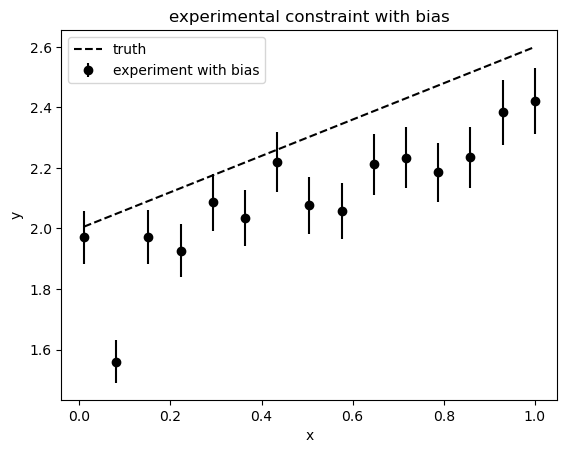

In [13]:
plt.errorbar(
    x,
    y_exp,
    y_stat_err,
    color="k",
    marker="o",
    linestyle="none",
    label="experiment with bias",
)
plt.plot(x, y_true, "k--", label="truth")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("experimental constraint with bias")

## Compare Likelihood Models
We will look at a few different cases:
1. Covariance is fixed to just statistical error (disregarding systematic error)

   \begin{equation}
       \Sigma_{ij} = \delta_{ij} \sigma_{stat,i}^2
   \end{equation}

3. Covariance is just statistical error, but we fit the magnitude of the statistical noise $\eta$ (disregarding systematic error). This means the covariance is not fixed, but will be updated during calibration.

   \begin{equation}
       \Sigma_{ij} = \delta_{ij} \eta^2 y_m(x_j; \alpha)^2
   \end{equation}


5. Systematic error is included properly in covariance, making the covariance a function of the model prediction. Again, this means the covariance is not fixed, but will be updated during calibration.

    \begin{equation}
       \Sigma_{ij}(\alpha) = \delta_{ij} \sigma_{stat,i}^2 + \sigma_N^2 y_m(x_i; \alpha) y_m(x_j; \alpha)
   \end{equation}

7. Systematic error is included improperly in covariance, using the experimental $y(x_i)$ instead of the model prediction $y_m(x_i;\alpha)$. In this case the covariance is again fixed.

    \begin{equation}
       \Sigma_{ij} = \delta_{ij} \sigma_{stat,i}^2 + \sigma_N^2 y(x_i) y(x_j)
   \end{equation}


In [14]:
# 1 and 2
obs_stat_only = rxmc.observation.Observation(
    x=x,
    y=y_exp,
    y_stat_err=y_stat_err,
)

# 3
obs_sys_norm_correct = rxmc.observation.Observation(
    x=x,
    y=y_exp,
    y_stat_err=y_stat_err,
    y_sys_err_normalization=systematic_fractional_err,
)

# 4
obs_sys_norm_wrong = rxmc.observation.FixedCovarianceObservation(
    x=x,
    y=y_exp,
    covariance=np.diag(y_stat_err**2)
    + systematic_fractional_err**2 * np.outer(y_exp, y_exp),
)

## set up likelihood models and constraints

In [15]:
# 1 and 3
likelihood = rxmc.likelihood_model.LikelihoodModel()

# 4
likelihood_fixed_cov = rxmc.likelihood_model.FixedCovarianceLikelihood()


# 2 - a special likelihood model that takes in the noise fraction as a parameter
likelihood_unknown_stat = rxmc.likelihood_model.UnknownNoiseFractionErrorModel()

In [16]:
# 1
evidence_stat_only = rxmc.evidence.Evidence(
    [
        rxmc.constraint.Constraint(
            [obs_stat_only],
            my_model,
            likelihood,
        )
    ]
)

# 2
evidence_unknown_stat = rxmc.evidence.Evidence(
    constraints=[],
    parametric_constraints=[
        rxmc.constraint.Constraint(
            [obs_stat_only],
            my_model,
            likelihood_unknown_stat,
        )
    ],
)

# 3
evidence_sys_correct = rxmc.evidence.Evidence(
    [
        rxmc.constraint.Constraint(
            [obs_sys_norm_correct],
            my_model,
            likelihood,
        )
    ]
)

# 4
evidence_sys_wrong = rxmc.evidence.Evidence(
    [
        rxmc.constraint.Constraint(
            [obs_sys_norm_wrong],
            my_model,
            likelihood_fixed_cov,
        )
    ]
)

In [17]:
def proposal_distribution_model(x):
    return stats.multivariate_normal.rvs(
        mean=x, cov=prior_distribution.cov / 1000, random_state=rng
    )

In [18]:
my_model_sampling_config = rxmc.param_sampling.SamplingConfig(
    params=my_model.params,
    starting_location=prior_distribution.mean,
    proposal=proposal_distribution_model,
    prior=prior_distribution,
)

## Run option 1: fixed covariance, statistical error only

In [19]:
walker1 = rxmc.walker.Walker(
    my_model_sampling_config,
    evidence_stat_only,
    rng=rng,
)

In [20]:
%%time
walker1.walk(n_steps=10000, burnin=1000)

Burn-in batch 1/1 completed, 1000 steps.
Batch: 1/1 completed, 10000 steps. 
  Model parameter acceptance fraction: 0.328
CPU times: user 3.33 s, sys: 1.51 ms, total: 3.33 s
Wall time: 3.33 s


0.3282

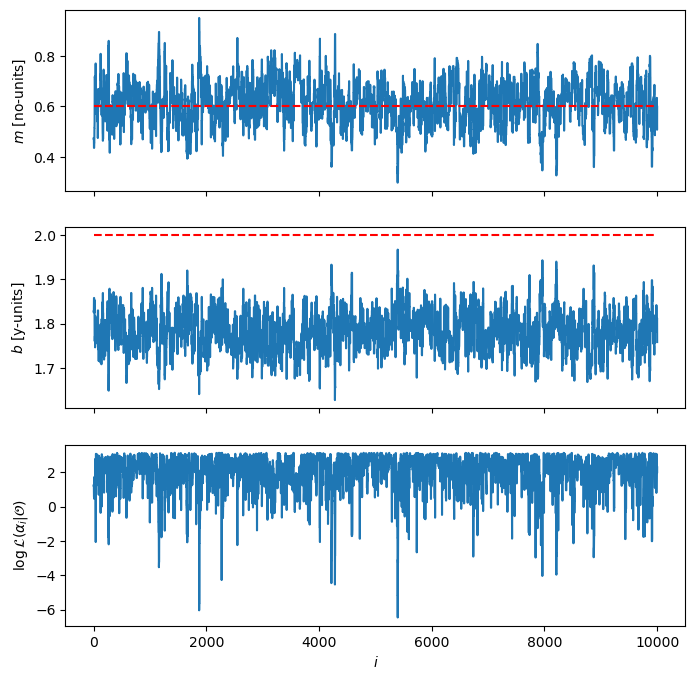

In [21]:
plot_chains(walker=walker1, model=my_model, true_params=true_params)

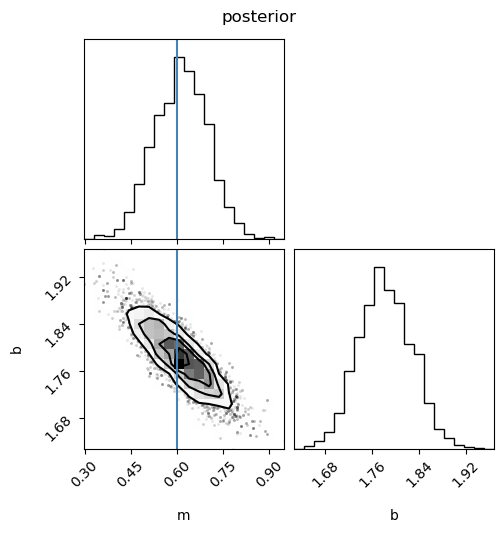

In [22]:
plot_posterior_corner(walker=walker1, true_params=true_params)

Text(0.5, 1.0, 'option 1: fixed statistical error, systematic ignored')

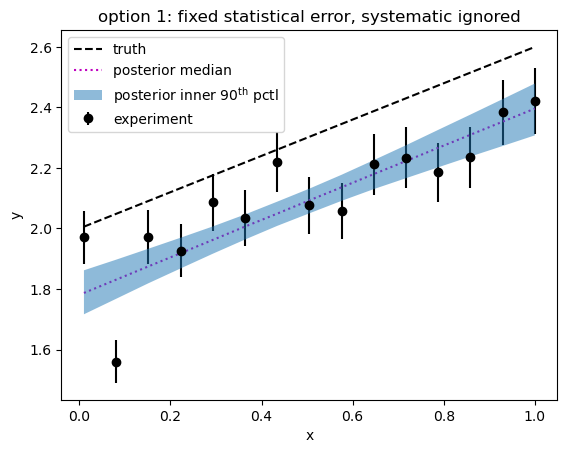

In [23]:
plot_predictive_post(
    walker=walker1, model=my_model, x=x, y_exp=y_exp, y_err=y_stat_err, y_true=y_true
)
plt.title("option 1: fixed statistical error, systematic ignored")

## Run option 2: unknown statistical error

We need to come up with a prior for the noise for option 2. We will keep it fairly wide and centered about the reported value.

In [24]:
noise_prior = stats.norm(loc=noise_fraction, scale=0.1)

In [25]:
def proposal_distribution_noise(x):
    return np.atleast_1d(
        np.fabs(
            stats.multivariate_normal.rvs(
                mean=x, cov=np.array([[0.005]]), random_state=rng
            )
        )
    )

In [26]:
noise_sampling_config = rxmc.param_sampling.SamplingConfig(
    params=likelihood_unknown_stat.params,
    starting_location=noise_prior.mean(),
    proposal=proposal_distribution_noise,
    prior=noise_prior,
)

In [27]:
def proposal_distribution_model_unknown_stat(x):
    return stats.multivariate_normal.rvs(
        mean=x, cov=prior_distribution.cov / 10, random_state=rng
    )

In [28]:
model_sampling_config2 = rxmc.param_sampling.SamplingConfig(
    params=my_model.params,
    starting_location=prior_distribution.mean,
    proposal=proposal_distribution_model_unknown_stat,
    prior=prior_distribution,
)

In [29]:
walker2 = rxmc.walker.Walker(
    model_sample_conf=my_model_sampling_config,
    evidence=evidence_unknown_stat,
    likelihood_sample_confs=[noise_sampling_config],
    rng=rng,
)

In [30]:
%%time
walker2.walk(
    n_steps=10000,
    burnin=1000,
    batch_size=100,
)

Burn-in batch 1/10 completed, 100 steps.
Burn-in batch 2/10 completed, 100 steps.
Burn-in batch 3/10 completed, 100 steps.
Burn-in batch 4/10 completed, 100 steps.
Burn-in batch 5/10 completed, 100 steps.
Burn-in batch 6/10 completed, 100 steps.
Burn-in batch 7/10 completed, 100 steps.
Burn-in batch 8/10 completed, 100 steps.
Burn-in batch 9/10 completed, 100 steps.
Burn-in batch 10/10 completed, 100 steps.
Batch: 1/100 completed, 100 steps. 
  Model parameter acceptance fraction: 0.440
  Likelihood parameter acceptance fractions: [0.23]
Batch: 2/100 completed, 100 steps. 
  Model parameter acceptance fraction: 0.520
  Likelihood parameter acceptance fractions: [0.31]
Batch: 3/100 completed, 100 steps. 
  Model parameter acceptance fraction: 0.590
  Likelihood parameter acceptance fractions: [0.27]
Batch: 4/100 completed, 100 steps. 
  Model parameter acceptance fraction: 0.460
  Likelihood parameter acceptance fractions: [0.28]
Batch: 5/100 completed, 100 steps. 
  Model parameter acc

(0.4627, [0.2533])

In [31]:
def plot_chains_with_err(walker, model, true_params):
    fig, axes = plt.subplots(
        walker.model_chain.shape[1] + 3, 1, figsize=(8, 8), sharex=True
    )
    for i in range(walker.model_chain.shape[1]):
        axes[i].plot(walker.model_chain[:, i])
        axes[i].set_ylabel(f"${model.params[i].latex_name}$ [{model.params[i].unit}]")
        true_value = true_params[model.params[i].name]
        axes[i].hlines(true_value, 0, len(walker.model_chain), "r", linestyle="--")

    axes[-3].plot(walker.log_posterior_record)
    axes[-3].set_ylabel(r"$\log{\mathcal{L}(\alpha_i | \mathcal{O})}$")

    lmp = walker.likelihood_sample_confs[0].params[0]
    axes[-2].plot(walker.likelihood_chain[0])
    axes[-2].set_ylabel(f"${lmp.latex_name}$ [{lmp.unit}]")
    axes[-2].hlines(noise_fraction, 0, len(walker.model_chain), "r", linestyle="--")

    axes[-1].plot(walker.log_posterior_record_lm[0])
    axes[-1].set_ylabel(r"$\log{\mathcal{L}(\alpha_i | \mathcal{O})}$")

    axes[-1].set_xlabel(r"$i$")
    # plt.legend(title="chains", ncol=3,)

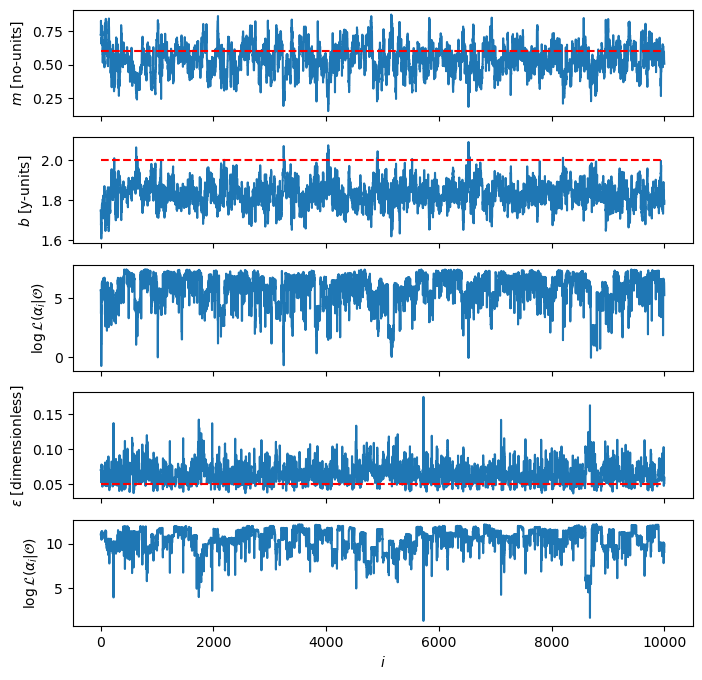

In [32]:
plot_chains_with_err(walker2, my_model, true_params)

Text(0.5, 0.98, 'posterior')

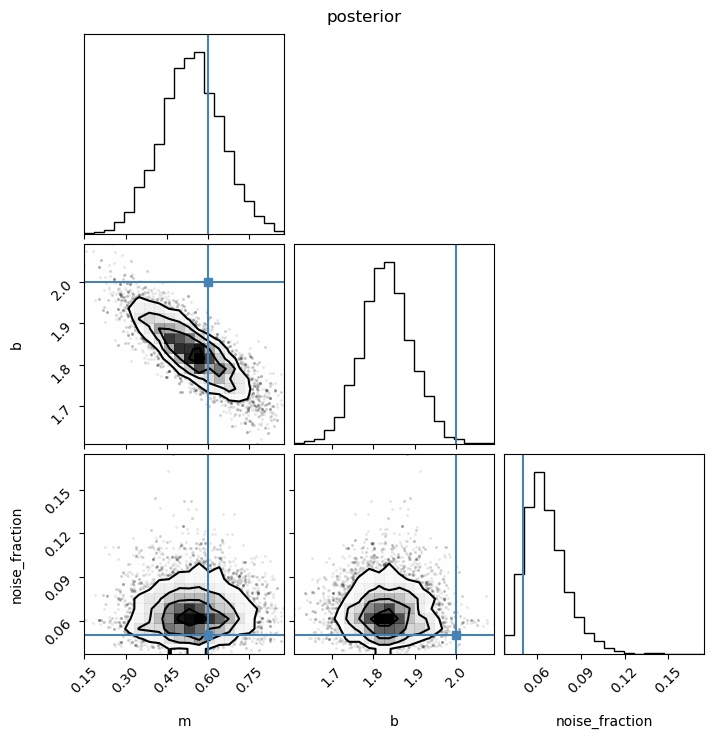

In [33]:
fig = corner.corner(
    np.hstack([walker2.model_chain, walker2.likelihood_chain[0]]),
    labels=[p.name for p in my_model.params]
    + [walker2.likelihood_sample_confs[0].params[0].name],
    label="posterior",
    truths=[true_params["m"], true_params["b"], noise_fraction],
)
fig.suptitle("posterior")

Text(0.5, 1.0, 'option 2: unknown statistical error, systematic ignored')

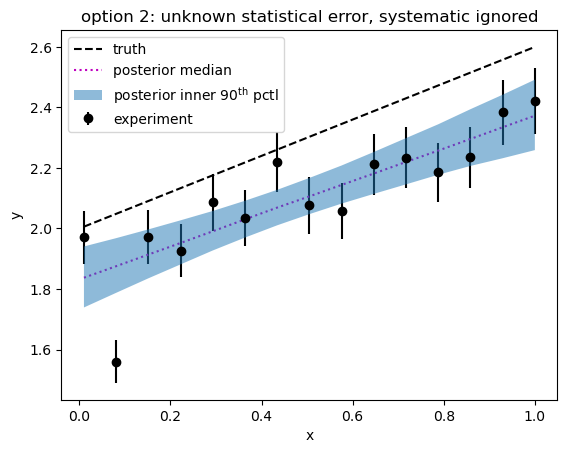

In [34]:
plot_predictive_post(
    walker=walker2, model=my_model, x=x, y_exp=y_exp, y_err=y_stat_err, y_true=y_true
)
plt.title("option 2: unknown statistical error, systematic ignored")

## Run option 3: correct formulation of the systematic error

In [35]:
walker3 = rxmc.walker.Walker(
    my_model_sampling_config,
    evidence_sys_correct,
    rng=rng,
)

In [36]:
%%time
walker3.walk(n_steps=10000, burnin=1000)

Burn-in batch 1/1 completed, 1000 steps.
Batch: 1/1 completed, 10000 steps. 
  Model parameter acceptance fraction: 0.738
CPU times: user 3.84 s, sys: 2.81 ms, total: 3.84 s
Wall time: 3.84 s


0.7379

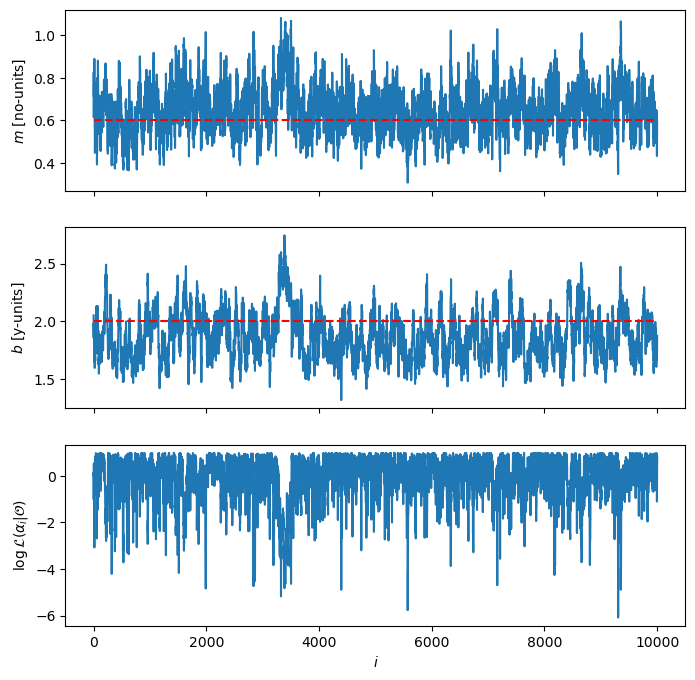

In [37]:
plot_chains(walker=walker3, model=my_model, true_params=true_params)

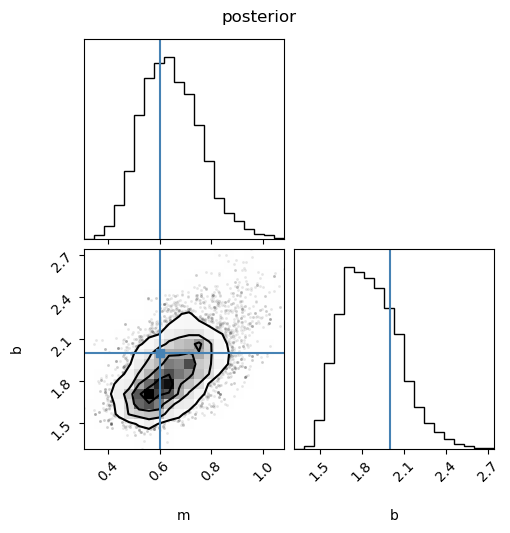

In [38]:
plot_posterior_corner(walker=walker3, true_params=true_params)

Text(0.5, 1.0, 'option 3: systematic included correctly')

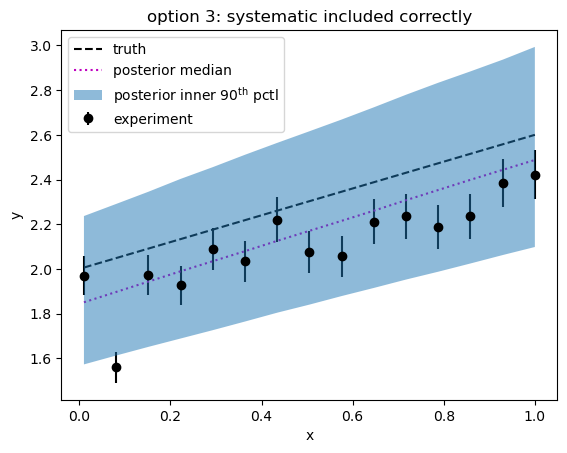

In [39]:
plot_predictive_post(
    walker=walker3, model=my_model, x=x, y_exp=y_exp, y_err=y_stat_err, y_true=y_true
)
plt.title("option 3: systematic included correctly")

## Run option 4: incorrect formulation of the systematic error

In [40]:
walker4 = rxmc.walker.Walker(
    my_model_sampling_config,
    evidence_sys_wrong,
    rng=rng,
)

In [41]:
%%time
walker4.walk(n_steps=10000, burnin=1000)

Burn-in batch 1/1 completed, 1000 steps.
Batch: 1/1 completed, 10000 steps. 
  Model parameter acceptance fraction: 0.722
CPU times: user 2.79 s, sys: 0 ns, total: 2.79 s
Wall time: 2.79 s


0.7224

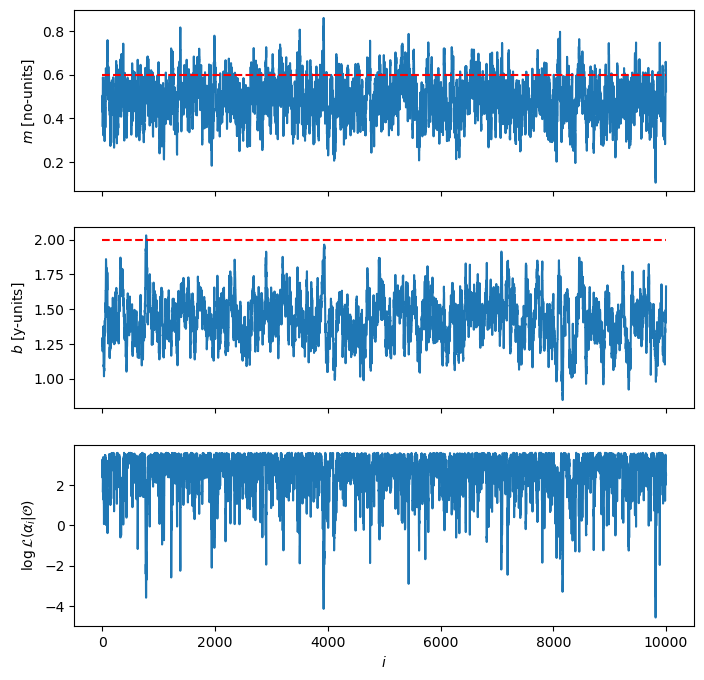

In [42]:
plot_chains(walker=walker4, model=my_model, true_params=true_params)

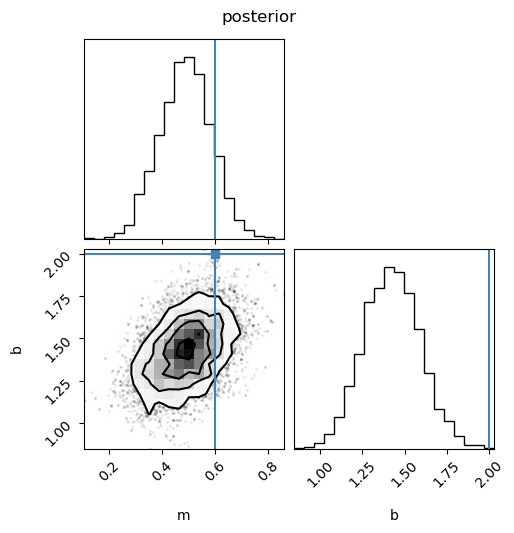

In [43]:
plot_posterior_corner(walker=walker4, true_params=true_params)

Text(0.5, 1.0, 'option 4: systematic included incorrectly')

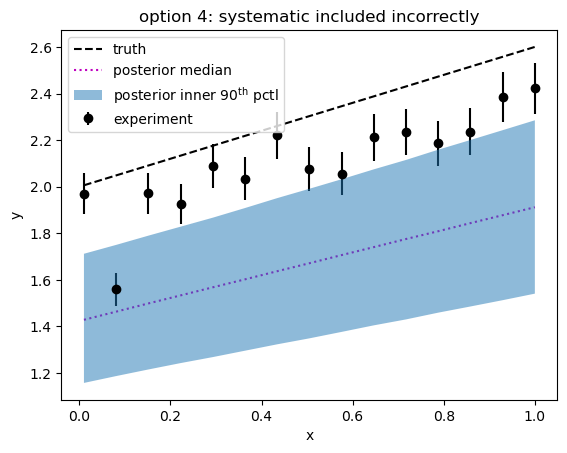

In [44]:
plot_predictive_post(
    walker=walker4, model=my_model, x=x, y_exp=y_exp, y_err=y_stat_err, y_true=y_true
)
plt.title("option 4: systematic included incorrectly")

# Multiple constraints
Let's choose a second constraint, with the same normalization bias in the opposite direction and the same coverage over the $x$-domain.

In [45]:
systematic_fractional_err2 = 0.1
# choose a normalization 1 std deviation above the mean this time
N2 = 1 + systematic_fractional_err2
noise_fraction2 = 0.025
x2 = np.linspace(0.01, 0.8, 27, dtype=float)
y_true2 = my_model.y(x2, *list(true_params.values()))
y_exp2 = (y_true2 + rng.normal(scale=noise_fraction2 * y_true2, size=len(x2))) * N2
y_stat_err2 = noise_fraction2 * y_exp2 * N2

In [46]:
x_full = np.linspace(-1, 2, 100)
y_true_full = my_model.y(x_full, *list(true_params.values()))

Text(0.5, 1.0, 'multiple experimental constraint with opposite bias')

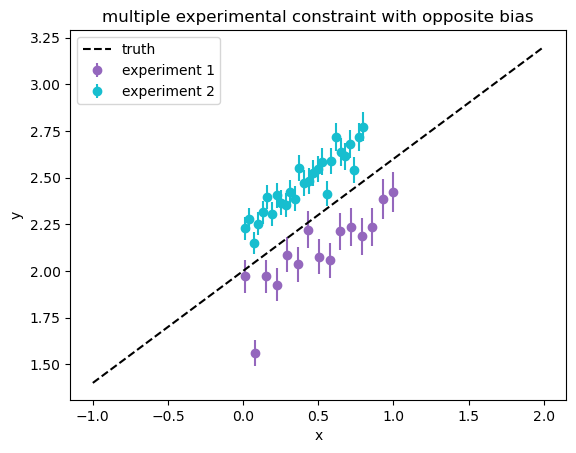

In [47]:
plt.errorbar(
    x,
    y_exp,
    y_stat_err,
    marker="o",
    linestyle="none",
    label="experiment 1",
    color="tab:purple",
)
plt.errorbar(
    x2,
    y_exp2,
    y_stat_err2,
    marker="o",
    linestyle="none",
    label="experiment 2",
    color="tab:cyan",
)

plt.plot(x_full, y_true_full, "k--", label="truth")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("multiple experimental constraint with opposite bias")

In [48]:
# 1 and 2
obs_stat_only2 = rxmc.observation.Observation(
    x=x2,
    y=y_exp2,
    y_stat_err=y_stat_err2,
)

# 3
obs_sys_norm_correct2 = rxmc.observation.Observation(
    x=x2,
    y=y_exp2,
    y_stat_err=y_stat_err2,
    y_sys_err_normalization=systematic_fractional_err2,
)

# 4
obs_sys_norm_wrong2 = rxmc.observation.FixedCovarianceObservation(
    x=x2,
    y=y_exp2,
    covariance=np.diag(y_stat_err2**2)
    + systematic_fractional_err2**2 * np.outer(y_exp2, y_exp2),
)

## set up likelihood models and constraints

In [49]:
# 1
evidence_stat_only = rxmc.evidence.Evidence(
    [
        rxmc.constraint.Constraint(
            [obs_stat_only, obs_stat_only2],
            my_model,
            likelihood,
        )
    ]
)

# 2
evidence_unknown_stat = rxmc.evidence.Evidence(
    constraints=[],
    parametric_constraints=[
        rxmc.constraint.Constraint(
            [obs_stat_only, obs_stat_only2],
            my_model,
            likelihood_unknown_stat,
        )
    ],
)

# 3
evidence_sys_correct = rxmc.evidence.Evidence(
    [
        rxmc.constraint.Constraint(
            [obs_sys_norm_correct, obs_sys_norm_correct2],
            my_model,
            likelihood,
        )
    ]
)

# 4
evidence_sys_wrong = rxmc.evidence.Evidence(
    [
        rxmc.constraint.Constraint(
            [obs_sys_norm_wrong, obs_sys_norm_wrong2],
            my_model,
            likelihood_fixed_cov,
        )
    ]
)

In [50]:
walker1 = rxmc.walker.Walker(
    my_model_sampling_config,
    evidence_stat_only,
    rng=rng,
)

In [51]:
%%time
walker1.walk(n_steps=10000, burnin=1000)

Burn-in batch 1/1 completed, 1000 steps.
Batch: 1/1 completed, 10000 steps. 
  Model parameter acceptance fraction: 0.153
CPU times: user 4.43 s, sys: 0 ns, total: 4.43 s
Wall time: 4.43 s


0.1528

In [52]:
upper1, med1, lower1 = np.percentile(
    [my_model.y(x_full, *p) for p in walker1.model_chain],
    [5, 50, 95],
    axis=0,
)

In [53]:
walker2 = rxmc.walker.Walker(
    model_sample_conf=my_model_sampling_config,
    evidence=evidence_unknown_stat,
    likelihood_sample_confs=[noise_sampling_config],
    rng=rng,
)

In [54]:
%%time
walker2.walk(
    n_steps=10000,
    burnin=1000,
    batch_size=100,
)

Burn-in batch 1/10 completed, 100 steps.
Burn-in batch 2/10 completed, 100 steps.
Burn-in batch 3/10 completed, 100 steps.
Burn-in batch 4/10 completed, 100 steps.
Burn-in batch 5/10 completed, 100 steps.
Burn-in batch 6/10 completed, 100 steps.
Burn-in batch 7/10 completed, 100 steps.
Burn-in batch 8/10 completed, 100 steps.
Burn-in batch 9/10 completed, 100 steps.
Burn-in batch 10/10 completed, 100 steps.
Batch: 1/100 completed, 100 steps. 
  Model parameter acceptance fraction: 0.420
  Likelihood parameter acceptance fractions: [0.21]
Batch: 2/100 completed, 100 steps. 
  Model parameter acceptance fraction: 0.530
  Likelihood parameter acceptance fractions: [0.23]
Batch: 3/100 completed, 100 steps. 
  Model parameter acceptance fraction: 0.490
  Likelihood parameter acceptance fractions: [0.23]
Batch: 4/100 completed, 100 steps. 
  Model parameter acceptance fraction: 0.380
  Likelihood parameter acceptance fractions: [0.23]
Batch: 5/100 completed, 100 steps. 
  Model parameter acc

(0.4725, [0.1872])

In [55]:
upper2, med2, lower2 = np.percentile(
    [my_model.y(x_full, *p) for p in walker2.model_chain],
    [5, 50, 95],
    axis=0,
)

In [56]:
walker3 = rxmc.walker.Walker(
    my_model_sampling_config,
    evidence_sys_correct,
    rng=rng,
)

In [57]:
%%time
walker3.walk(n_steps=10000, burnin=1000)

Burn-in batch 1/1 completed, 1000 steps.
Batch: 1/1 completed, 10000 steps. 
  Model parameter acceptance fraction: 0.590
CPU times: user 4.04 s, sys: 4.05 ms, total: 4.04 s
Wall time: 4.05 s


0.59

In [58]:
upper3, med3, lower3 = np.percentile(
    [my_model.y(x_full, *p) for p in walker3.model_chain],
    [5, 50, 95],
    axis=0,
)

In [59]:
walker4 = rxmc.walker.Walker(
    my_model_sampling_config,
    evidence_sys_wrong,
    rng=rng,
)

In [60]:
%%time
walker4.walk(n_steps=10000, burnin=1000)

Burn-in batch 1/1 completed, 1000 steps.
Batch: 1/1 completed, 10000 steps. 
  Model parameter acceptance fraction: 0.592
CPU times: user 2.62 s, sys: 3.95 ms, total: 2.62 s
Wall time: 2.63 s


0.5922

In [61]:
upper4, med4, lower4 = np.percentile(
    [my_model.y(x_full, *p) for p in walker4.model_chain],
    [5, 50, 95],
    axis=0,
)

Text(0.5, 1.0, 'multiple constraints with systematic normalization error')

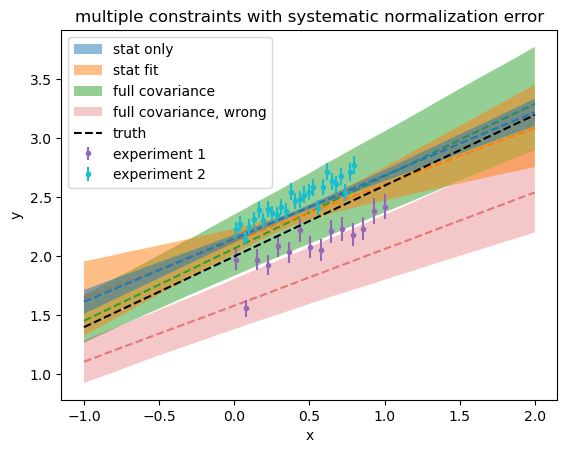

In [62]:
plt.errorbar(
    x,
    y_exp,
    y_stat_err,
    marker=".",
    linestyle="none",
    label="experiment 1",
    color="tab:purple",
    zorder=999,
)
plt.errorbar(
    x2,
    y_exp2,
    y_stat_err2,
    marker=".",
    linestyle="none",
    label="experiment 2",
    color="tab:cyan",
    zorder=999,
)
p = plt.fill_between(x_full, lower1, upper1, label="stat only", alpha=0.5, zorder=99)
plt.plot(x_full, med1, "--", color=p.get_facecolor(), alpha=1, zorder=100)


p = plt.fill_between(x_full, lower2, upper2, label="stat fit", alpha=0.5, zorder=89)
plt.plot(x_full, med2, "--", color=p.get_facecolor(), alpha=1, zorder=90)


p = plt.fill_between(x_full, lower3, upper3, label="full covariance", alpha=0.5)
plt.plot(x_full, med3, "--", color=p.get_facecolor(), alpha=1, zorder=89)

p = plt.fill_between(x_full, lower4, upper4, label="full covariance, wrong", alpha=0.25)
plt.plot(x_full, med4, "--", color=p.get_facecolor(), alpha=0.5)


plt.plot(x_full, y_true_full, "k--", label="truth", zorder=999)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("multiple constraints with systematic normalization error")

# Multiple constraints with offset domain
Let's choose a second constraint, with the same normalization bias in the opposite direction and slightly different coverage opver $x$.

In [63]:
x2 = np.linspace(0.6, 1.4, 27, dtype=float)
y_true2 = my_model.y(x2, *list(true_params.values()))
y_exp2 = (y_true2 + rng.normal(scale=noise_fraction2 * y_true2, size=len(x2))) * N2
y_stat_err2 = noise_fraction2 * y_exp2 * N2

Text(0.5, 1.0, '$x$-offset experimental constraint with opposite bias')

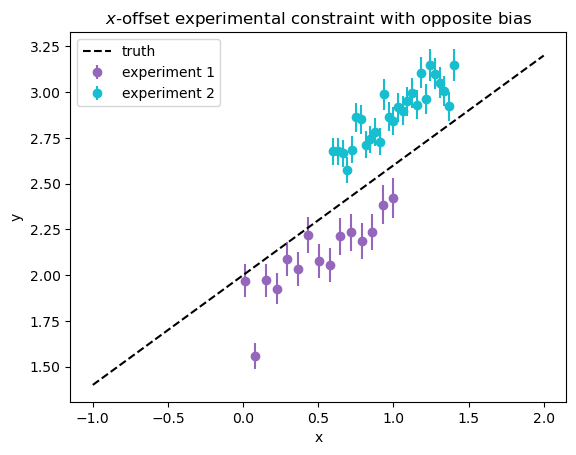

In [64]:
plt.errorbar(
    x,
    y_exp,
    y_stat_err,
    marker="o",
    linestyle="none",
    label="experiment 1",
    color="tab:purple",
)
plt.errorbar(
    x2,
    y_exp2,
    y_stat_err2,
    marker="o",
    linestyle="none",
    label="experiment 2",
    color="tab:cyan",
)

plt.plot(x_full, y_true_full, "k--", label="truth")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("$x$-offset experimental constraint with opposite bias")

In [65]:
# 1 and 2
obs_stat_only2 = rxmc.observation.Observation(
    x=x2,
    y=y_exp2,
    y_stat_err=y_stat_err2,
)

# 3
obs_sys_norm_correct2 = rxmc.observation.Observation(
    x=x2,
    y=y_exp2,
    y_stat_err=y_stat_err2,
    y_sys_err_normalization=systematic_fractional_err2,
)

# 4
obs_sys_norm_wrong2 = rxmc.observation.FixedCovarianceObservation(
    x=x2,
    y=y_exp2,
    covariance=np.diag(y_stat_err2**2)
    + systematic_fractional_err2**2 * np.outer(y_exp2, y_exp2),
)

## set up likelihood models and constraints

In [66]:
# 1
evidence_stat_only = rxmc.evidence.Evidence(
    [
        rxmc.constraint.Constraint(
            [obs_stat_only, obs_stat_only2],
            my_model,
            likelihood,
        )
    ]
)

# 2
evidence_unknown_stat = rxmc.evidence.Evidence(
    constraints=[],
    parametric_constraints=[
        rxmc.constraint.Constraint(
            [obs_stat_only, obs_stat_only2],
            my_model,
            likelihood_unknown_stat,
        )
    ],
)

# 3
evidence_sys_correct = rxmc.evidence.Evidence(
    [
        rxmc.constraint.Constraint(
            [obs_sys_norm_correct, obs_sys_norm_correct2],
            my_model,
            likelihood,
        )
    ]
)

# 4
evidence_sys_wrong = rxmc.evidence.Evidence(
    [
        rxmc.constraint.Constraint(
            [obs_sys_norm_wrong, obs_sys_norm_wrong2],
            my_model,
            likelihood_fixed_cov,
        )
    ]
)

In [67]:
walker1 = rxmc.walker.Walker(
    my_model_sampling_config,
    evidence_stat_only,
    rng=rng,
)

In [68]:
%%time
walker1.walk(n_steps=10000, burnin=1000)

Burn-in batch 1/1 completed, 1000 steps.
Batch: 1/1 completed, 10000 steps. 
  Model parameter acceptance fraction: 0.140
CPU times: user 4.01 s, sys: 2.02 ms, total: 4.01 s
Wall time: 4.01 s


0.1399

In [69]:
upper1, med1, lower1 = np.percentile(
    [my_model.y(x_full, *p) for p in walker1.model_chain],
    [5, 50, 95],
    axis=0,
)

In [70]:
walker2 = rxmc.walker.Walker(
    model_sample_conf=my_model_sampling_config,
    evidence=evidence_unknown_stat,
    likelihood_sample_confs=[noise_sampling_config],
    rng=rng,
)

In [71]:
%%time
walker2.walk(
    n_steps=10000,
    burnin=1000,
    batch_size=100,
)

Burn-in batch 1/10 completed, 100 steps.
Burn-in batch 2/10 completed, 100 steps.
Burn-in batch 3/10 completed, 100 steps.
Burn-in batch 4/10 completed, 100 steps.
Burn-in batch 5/10 completed, 100 steps.
Burn-in batch 6/10 completed, 100 steps.
Burn-in batch 7/10 completed, 100 steps.
Burn-in batch 8/10 completed, 100 steps.
Burn-in batch 9/10 completed, 100 steps.
Burn-in batch 10/10 completed, 100 steps.
Batch: 1/100 completed, 100 steps. 
  Model parameter acceptance fraction: 0.360
  Likelihood parameter acceptance fractions: [0.13]
Batch: 2/100 completed, 100 steps. 
  Model parameter acceptance fraction: 0.500
  Likelihood parameter acceptance fractions: [0.19]
Batch: 3/100 completed, 100 steps. 
  Model parameter acceptance fraction: 0.430
  Likelihood parameter acceptance fractions: [0.14]
Batch: 4/100 completed, 100 steps. 
  Model parameter acceptance fraction: 0.250
  Likelihood parameter acceptance fractions: [0.17]
Batch: 5/100 completed, 100 steps. 
  Model parameter acc

(0.4019, [0.1756])

In [72]:
upper2, med2, lower2 = np.percentile(
    [my_model.y(x_full, *p) for p in walker2.model_chain],
    [5, 50, 95],
    axis=0,
)

In [73]:
walker3 = rxmc.walker.Walker(
    my_model_sampling_config,
    evidence_sys_correct,
    rng=rng,
)

In [74]:
%%time
walker3.walk(n_steps=10000, burnin=1000)

Burn-in batch 1/1 completed, 1000 steps.
Batch: 1/1 completed, 10000 steps. 
  Model parameter acceptance fraction: 0.636
CPU times: user 4.01 s, sys: 2.97 ms, total: 4.01 s
Wall time: 4.01 s


0.6364

In [75]:
upper3, med3, lower3 = np.percentile(
    [my_model.y(x_full, *p) for p in walker3.model_chain],
    [5, 50, 95],
    axis=0,
)

In [76]:
walker4 = rxmc.walker.Walker(
    my_model_sampling_config,
    evidence_sys_wrong,
    rng=rng,
)

In [77]:
%%time
walker4.walk(n_steps=10000, burnin=1000)

Burn-in batch 1/1 completed, 1000 steps.
Batch: 1/1 completed, 10000 steps. 
  Model parameter acceptance fraction: 0.617
CPU times: user 2.63 s, sys: 13.9 ms, total: 2.64 s
Wall time: 2.64 s


0.6171

In [78]:
upper4, med4, lower4 = np.percentile(
    [my_model.y(x_full, *p) for p in walker4.model_chain],
    [5, 50, 95],
    axis=0,
)

Text(0.5, 1.0, '$x$-offset constraints with systematic normalization error')

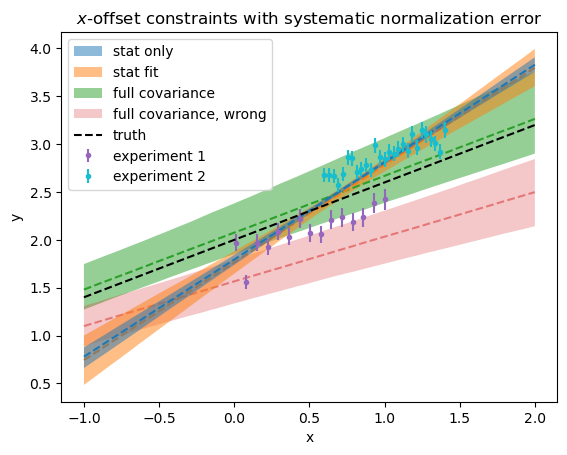

In [79]:
plt.errorbar(
    x,
    y_exp,
    y_stat_err,
    marker=".",
    linestyle="none",
    label="experiment 1",
    color="tab:purple",
    zorder=999,
)
plt.errorbar(
    x2,
    y_exp2,
    y_stat_err2,
    marker=".",
    linestyle="none",
    label="experiment 2",
    color="tab:cyan",
    zorder=999,
)
p = plt.fill_between(x_full, lower1, upper1, label="stat only", alpha=0.5, zorder=99)
plt.plot(x_full, med1, "--", color=p.get_facecolor(), alpha=1, zorder=100)


p = plt.fill_between(x_full, lower2, upper2, label="stat fit", alpha=0.5, zorder=89)
plt.plot(x_full, med2, "--", color=p.get_facecolor(), alpha=1, zorder=90)


p = plt.fill_between(x_full, lower3, upper3, label="full covariance", alpha=0.5)
plt.plot(x_full, med3, "--", color=p.get_facecolor(), alpha=1, zorder=89)

p = plt.fill_between(x_full, lower4, upper4, label="full covariance, wrong", alpha=0.25)
plt.plot(x_full, med4, "--", color=p.get_facecolor(), alpha=0.5)


plt.plot(x_full, y_true_full, "k--", label="truth", zorder=999)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("$x$-offset constraints with systematic normalization error")